In [4]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report

# Load data and model
data = pd.read_csv("engineered_data_week4.csv")
best_rf = joblib.load('best_rf_model.pkl')
scaler = joblib.load('scaler.pkl')

# Prepare features
X = data.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)
y = data['Target']
X = pd.get_dummies(X, columns=['Type', 'machine_type', 'wear_bin'])
X_scaled = scaler.transform(X)

# Train-test split
_, X_test, _, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Data and model loaded! Test shape:", X_test.shape)

Data and model loaded! Test shape: (2000, 21)


In [5]:
# Generate predictions and probabilities
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Save predictions for later blocks
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_proba})
pred_df.to_csv('predictions.csv', index=False)
print("Predictions generated and saved!")

Predictions generated and saved!


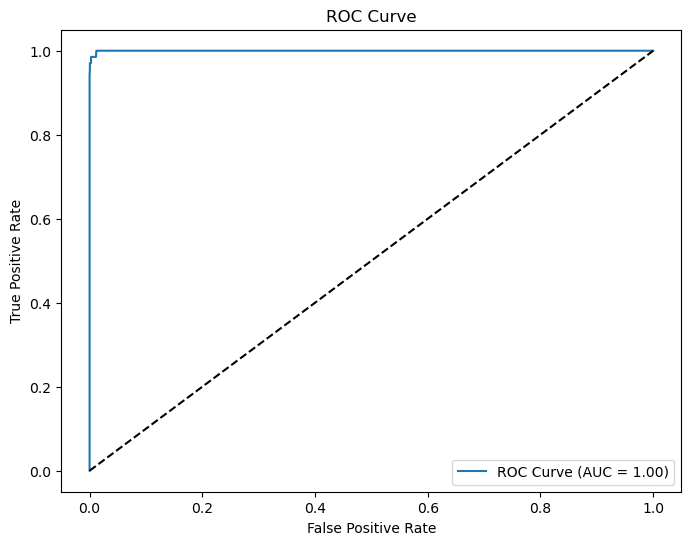

In [6]:
# Load predictions if needed (if restarting kernel)
pred_df = pd.read_csv('predictions.csv')
y_test = pred_df['Actual']
y_proba = pred_df['Probability']

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

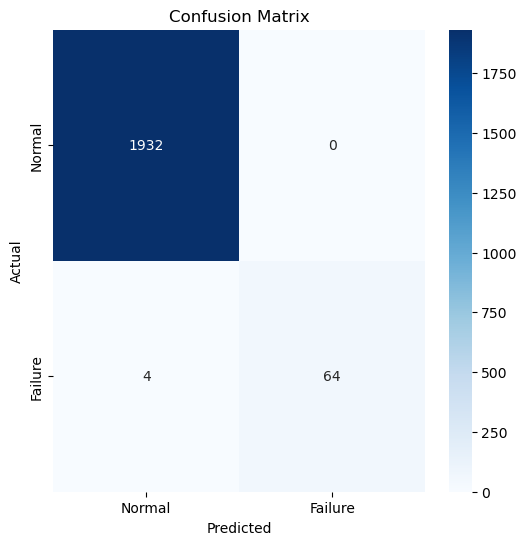

In [7]:
# Load predictions
pred_df = pd.read_csv('predictions.csv')
y_test = pred_df['Actual']
y_pred = pred_df['Predicted']

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Failure'],
            yticklabels=['Normal', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

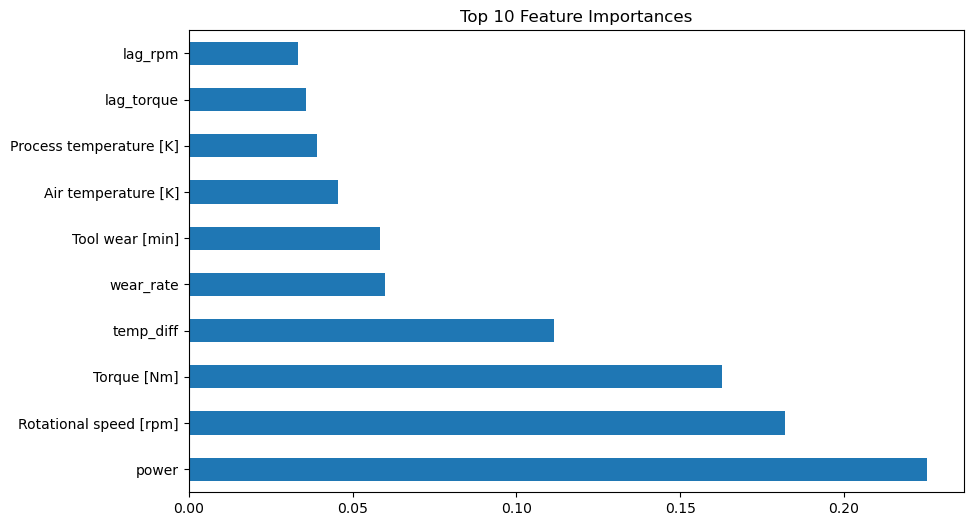

In [8]:
# Get feature names (after one-hot encoding)
feature_names = pd.get_dummies(X).columns

# Plot importance
importances = best_rf.feature_importances_
top_features = pd.Series(importances, index=feature_names).nlargest(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.savefig('feature_importance.png')
plt.show()